# Polynomial Regression

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures

In [17]:
df = pd.read_csv("Advertising.csv")

In [18]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [19]:
df = df.drop("Unnamed: 0", axis= 1)

In [20]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [21]:
df.shape

(200, 4)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [23]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### First, we will build a Linear Model on Data:

In [24]:
# Features:
x = df.drop("sales", axis= 1)

In [25]:
x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [26]:
# Target:
y = df["sales"]

In [27]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [29]:
# Train Test Split:
x_train, x_test, y_train, y_test = train_test_split(x , y , test_size= 0.3, random_state= 42)

In [30]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 3)
(60, 3)
(140,)
(60,)


In [31]:
# Building Linear Regression Model:
lr_model = LinearRegression()

In [32]:
lr_model.fit(x_train, y_train)

LinearRegression()

In [33]:
prediction = lr_model.predict(x_test)

In [34]:
np.sqrt(mean_squared_error(y_test, prediction))

1.9485372043446383

###  Polynomial Regression:

**From Preprocessing, import PolynomialFeatures, which will help us transform our original data set by adding polynomial features**

We will go from the equation in the form (shown here as if we only had one x feature):

$$\hat{y} = \beta_0 + \beta_1x_1 + \epsilon $$

and create more features from the original x feature for some *d* degree of polynomial.

$$\hat{y} = \beta_0 + \beta_1x_1 + \beta_1x^2_1 +  ... + \beta_dx^d_1 + \epsilon$$

Then we can call the linear regression model on it, since in reality, we're just treating these new polynomial features x^2, x^3, ... x^d as new features. Obviously we need to be careful about choosing the correct value of *d* , the degree of the model. Our metric results on the test set will help us with this!

**The other thing to note here is we have multiple X features, not just a single one as in the formula above, so in reality, the PolynomialFeatures will also take *interaction* terms into account for example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].**

In [35]:
# Creating Object of Polynomial Features with Degree = 2, which will convert our original features into fetures with power of 2.

polymomial_converter = PolynomialFeatures(degree= 2, include_bias= False)

In [36]:
# Converting Features Using Converter:

poly_features = polymomial_converter.fit_transform(x)

In [38]:
poly_features.shape

(200, 9)

In [ ]:
# Note: We had 3 Features in Original Data.

# We gave degree = 2 in converter.

# Suppose, our original data had features: a, b, c

# Polynomial Converter with Degree= 2 will covert these three features in:

# bias, a, b, c, ab, bc, ac, a^2, b^2, c^2.

# We gave include_bias= False while creating converter.

# That's why we got 9 features.

In [40]:
x.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [41]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [ ]:
# Building a Regression Model on These New Features:

In [42]:
# Train Test Split:
x_train, x_test, y_train, y_test = train_test_split(poly_features , y , test_size= 0.3, random_state= 42)

In [43]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 9)
(60, 9)
(140,)
(60,)


In [44]:
poly_model = LinearRegression()

In [45]:
poly_model.fit(x_train, y_train)

LinearRegression()

In [46]:
prediction = poly_model.predict(x_test)

In [47]:
np.sqrt(mean_squared_error(y_test, prediction))

0.7233218473857531

### Comparison with Simple Linear Regression

**Results on the Test Set (Note: Use the same Random Split to fairly compare!)**

* Simple Linear Regression:
    * RMSE: 1.948

* Polynomial 2-degree:
     * RMSE: 0.723

### Chosing a Model:

### Adjusting Parameters

Are we satisfied with this performance? Perhaps a higher order would improve performance even more! But how high is too high? It is now up to us to possibly go back and adjust our model and parameters, let's explore higher order Polynomials in a loop and plot out their error. This will nicely lead us into a discussion on Overfitting.

Let's use a for loop to do the following:

1. Create different order polynomial X data
2. Split that polynomial data for train/test
3. Fit on the training data
4. Report back the metrics on *both* the train and test results
5. Plot these results and explore overfitting

In [49]:
# List for Storing Training RMSE of Each Model
training_rmse = []

# List for Storing Testing RMSE of Each Model
testing_rmse = []

for degrees in range(1,11):
    
    # Creating Polynomial Conveter
    polymomial_converter = PolynomialFeatures(degree= degrees, include_bias= False)
    
    # Converting Data
    poly_features = polymomial_converter.fit_transform(x)
    
    #train test split
    x_train, x_test, y_train, y_test = train_test_split(poly_features , y , test_size= 0.3, random_state= 42)
    
    # Training The Model
    poly_model = LinearRegression()
    poly_model.fit(x_train, y_train)
    
    # Predicting For Train and Test Data
    train_pred = poly_model.predict(x_train)
    test_pred = poly_model.predict(x_test)
    
    # Calculating RMSE for Training and Testing Predictions
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
    # Appending Errors to Corresponding Lists
    training_rmse.append(train_rmse)
    testing_rmse.append(test_rmse)


In [50]:
# Training RMSE
training_rmse

[1.574596830590544,
 0.5950712355838925,
 0.4688758111822086,
 0.36946897017715674,
 0.24382206827180572,
 0.19737747791436286,
 0.42552782227379454,
 0.15782447559939888,
 0.16640536093291597,
 0.15552358483736892]

In [51]:
# Testing RMSE
testing_rmse

[1.9485372043446383,
 0.7233218473857531,
 0.5392350985609965,
 1.3032265967218177,
 5.946670177318908,
 25.96451684336015,
 634.4709144546548,
 2697.781178413146,
 133221.04828871827,
 443753.79875444644]

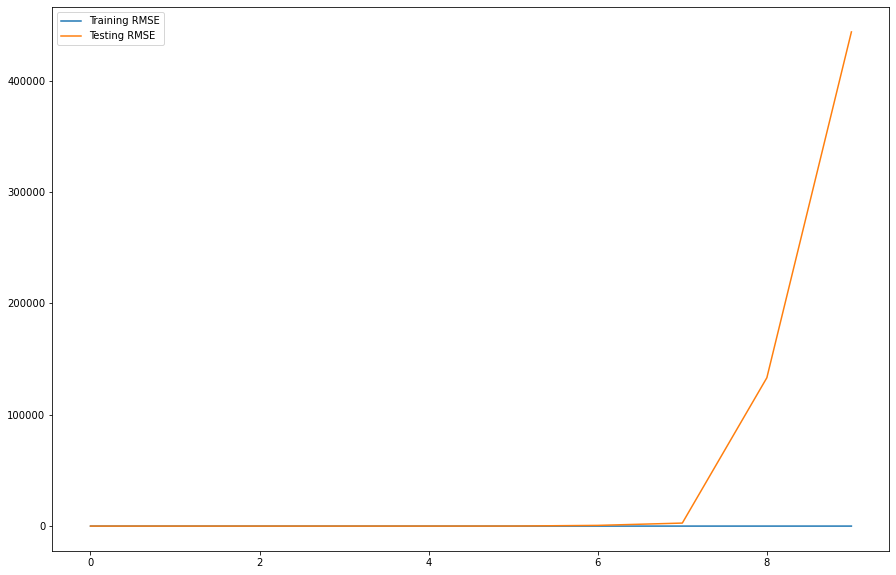

In [55]:
# Plotting Training and testing RMSE to find Optimal Degree of Polynomial for Our Model:

plt.figure(figsize=(15,10))

plt.plot(training_rmse, label= "Training RMSE")
plt.plot(testing_rmse, label= "Testing RMSE")

plt.legend()
plt.show()

In [ ]:
# Let's Zoom in the Graph a bit to fnd the optimal degree of Polynomial for Model.

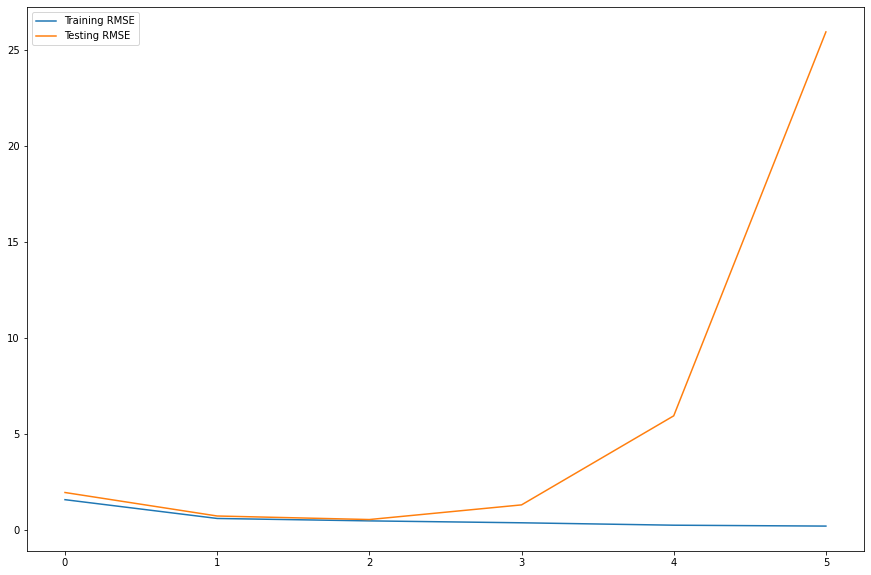

In [58]:
plt.figure(figsize=(15,10))

plt.plot(training_rmse[:6], label= "Training RMSE")
plt.plot(testing_rmse[:6], label= "Testing RMSE")


plt.legend()
plt.show()

In [ ]:
# As we can see, Lines of Training and Testing RMSE crosses at degree value 2 and are very close at degree value of 3.

# So, 2 or 3 is ideal degree of polynomial for our model.